# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivariance](#-Question-5---Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number. We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero).

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that \begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as \begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}
4. Prove the generalization bound:<br>
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$, \begin{equation}(3) \:\:
\epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
\end{equation} **Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
 bound (which we learned in class):<br>
     **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta$, \begin{equation} (4) \:\:
\epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
\end{equation}
5. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Equivariance
---

Recall from lecture 6:
A function $f: \mathbb{R}^d \to \mathbb{R}^d$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathbb{R}^{d\times d}$. Prove that $f_w:\mathbb{R}^d \to \mathbb{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

* Assume one-by-one activations (<a href="https://en.wikipedia.org/wiki/Injective_function">Injective functions/one-by-one</a>)

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$.
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | -  | -  |
| ReLU |  - | -  |
| POOL2|  - | -  |
|CONV3-128 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-256 | - | -|
|ReLU | - | -|
|CONV3-256 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
| FC-4096|  - | -  |
| FC-4096|  - | -  |
| FC-1000|  - | -  |
| SOFTMAX|  - | -  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [ ]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib notebook
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [ ]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
print(x.mean(), x.std())

Your answers here

In [ ]:
"""
Your Code Here - Use as many blocks as you need
"""

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera.

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [ ]:
# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

In [ ]:
# separate to train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.66)
sets = { 
    'x_train' : x_train,
    'x_test`' : x_test,
    'x_validation' : x_validation,
    'y_train' : y_train,
    'y_test' : y_test,
    'y_validation' : y_validation
}

In [ ]:
# pre-processing and converting labels to integers
for set: str in sets.keys:
    if not set.startswith('y'):
        continue
    sets[set] = np.array([0 if sets[set][i] == 'g' else 1 for i in range(len(sets[set]))]).astype(np.int)


In [ ]:
# training a Logistic Regression baseline - complete the code with your variables
logistic_model = LogisticRegression(solver='lbfgs')
y_pred = logistic_model.fit(X_train_prep, y_train_np).predict(X_train_prep)
print("Number of mislabeled points %d out of %d total points."% ((y_train_np != y_pred).sum(), X_train.shape[0]))
print("Logistic Regression Model accuracy =" , logistic_model.score(X_test_prep, y_test_np))

In [ ]:
# create TensorDataset from numpy arrays
"""
Your Code Here
"""

In [ ]:
# model, hyoer-paramerters and training
"""
Your Code Here - add as many blocks as you wish
"""

In [ ]:
# example of weight initialization
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self, parmaeters):
        super(MyModel, self).__init__()
        # model definitions/blocks
        # ...
        # custom initialization
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # pick initialzation: https://pytorch.org/docs/stable/nn.init.html
                # examples
                # nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                # nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu', a=math.sqrt(5))
                # nn.init.normal_(m.weight, 0, 0.005)
                # don't forget the bias term (m.bias)

    def forward(self, x):
        # ops on x
        # ...
        # output = f(x)
        return output

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>
3. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.
4. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
6. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.
7. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

100%|██████████| 99003388/99003388 [00:02<00:00, 40034262.78it/s]


Extracting ./datasets/imagenette2-160.tgz to ./datasets


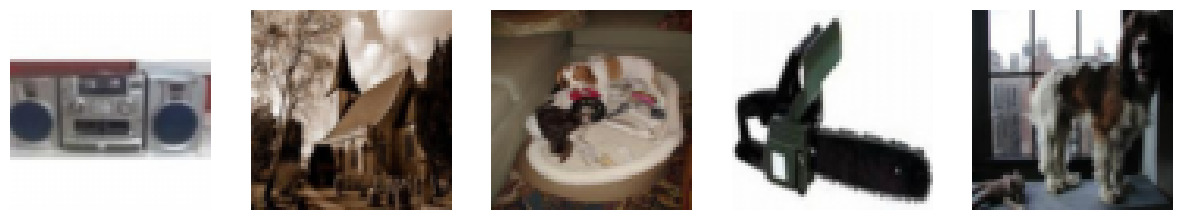

In [2]:
# !pip install kornia
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# import kornia.augmentation as K

# Define transforms
transform_train = transforms.Compose([
    transforms.ToTensor(),
    # K.RandomHorizontalFlip(),
    # K.RandomCrop((64, 64), padding=4),
    # K.ColorJitter(0.4, 0.4, 0.4, 0.1),
    transforms.Resize((64, 64)),

])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),

])

# Load datasets
train_dataset = datasets.Imagenette(root='./datasets', split='train', size='160px', download=True, transform=transform_train)
val_dataset = datasets.Imagenette(root='./datasets', split='val', size='160px', download=False, transform=transform_test)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Display 5 images from the training set
def show_images(loader, num_images=5):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        ax = axes[i]
        img = images[i].squeeze().permute(1,2,0).numpy()
        ax.imshow(img)
        ax.axis('off')
    plt.show()

show_images(train_loader)



In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()

        self.block1 = self._create_cnn_block(in_channels=3, out_channels=16)
        self.block2 = self._create_cnn_block(in_channels=16, out_channels=32)
        self.block3 = self._create_cnn_block(in_channels=32, out_channels=64)
        self.block4 = self._create_cnn_block(in_channels=64, out_channels=128)
        self.block5 = self._create_cnn_block(in_channels=128, out_channels=256)

        # Assuming each block halves the spatial dimensions
        self.fc1 = nn.Linear(256 * 2 * 2, 512)  # Adjust the input size to the Linear layer
        self.fc2 = nn.Linear(512, 10)  # Output layer with 10 classes

    def _create_cnn_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.GroupNorm(4, out_channels),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Example usage:
model = MyCNN()
# input_tensor = torch.randn(1, 3, 64, 64)  # Batch size of 1
# output = model(input_tensor)
# print(output.shape)  # Should be [1, 10]


In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
model_size_mb = num_params * 4 / (1024 ** 2)  # Assuming 4 bytes per parameter (float32)

print(f"Number of parameters: {num_params}")
print(f"Model size: {model_size_mb:.2f} MB")


Number of parameters: 923530
Model size: 3.52 MB


In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Hyperparameters
batch_size = 512
epochs = 50
learning_rate = 1e-3

# Optimizer, loss function, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=25):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.squeeze().to(device), labels.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimize the weights

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        # scheduler.step()  # Step the learning rate scheduler

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc.item())

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_running_loss = 0.0
        val_corrects = 0
        with torch.no_grad():  # Disable gradient calculation
            for inputs, labels in val_loader:
                inputs, labels = inputs.squeeze().to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.item())

        print(f'Epoch {epoch}/{num_epochs - 1}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

# Assuming train_loader and val_loader are predefined
train_loss, train_acc, val_loss, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs)

# Plot loss curves
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
import numpy as np

def evaluate_with_noise(model, val_loader, noise_levels):
    model.eval()
    results = {}
    for noise_level in noise_levels:
        corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs + noise_level * torch.randn_like(inputs)
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                corrects += torch.sum(preds == labels.data)
        acc = corrects.double() / len(val_loader.dataset)
        results[noise_level] = acc.item()
        print(f'Noise level {noise_level}: Accuracy {acc:.4f}')
    return results

# Evaluate with noise
noise_levels = [0.05, 0.01, 0.005]
noise_results = evaluate_with_noise(model, val_loader, noise_levels)


Noise level 0.05: Accuracy 0.0910
Noise level 0.01: Accuracy 0.0910
Noise level 0.005: Accuracy 0.0910


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/